First few rows of the loaded data:
               state  Fraud  Extortion  Causing Disrepute  Prank  \
0     Andhra Pradesh    537         65                  0      0   
1  Arunachal Pradesh      0          0                  0      0   
2              Assam     48         65                 40     40   
3              Bihar    397          3                  0      0   
4       Chhattisgarh     47          4                 29     18   

   Disrupt Public Service  Developing own business  Spreading Piracy  \
0                       1                        0                 1   
1                       0                        0                 0   
2                       0                        0                 0   
3                       0                        0                 0   
4                       0                        0                 0   

    Pervert  Steal Information  Others  total  
0         0                  0     217    821  
1         0                

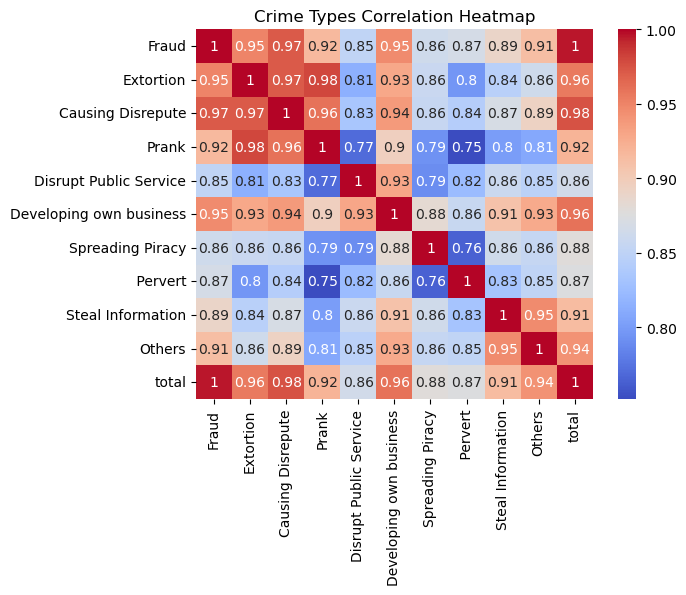

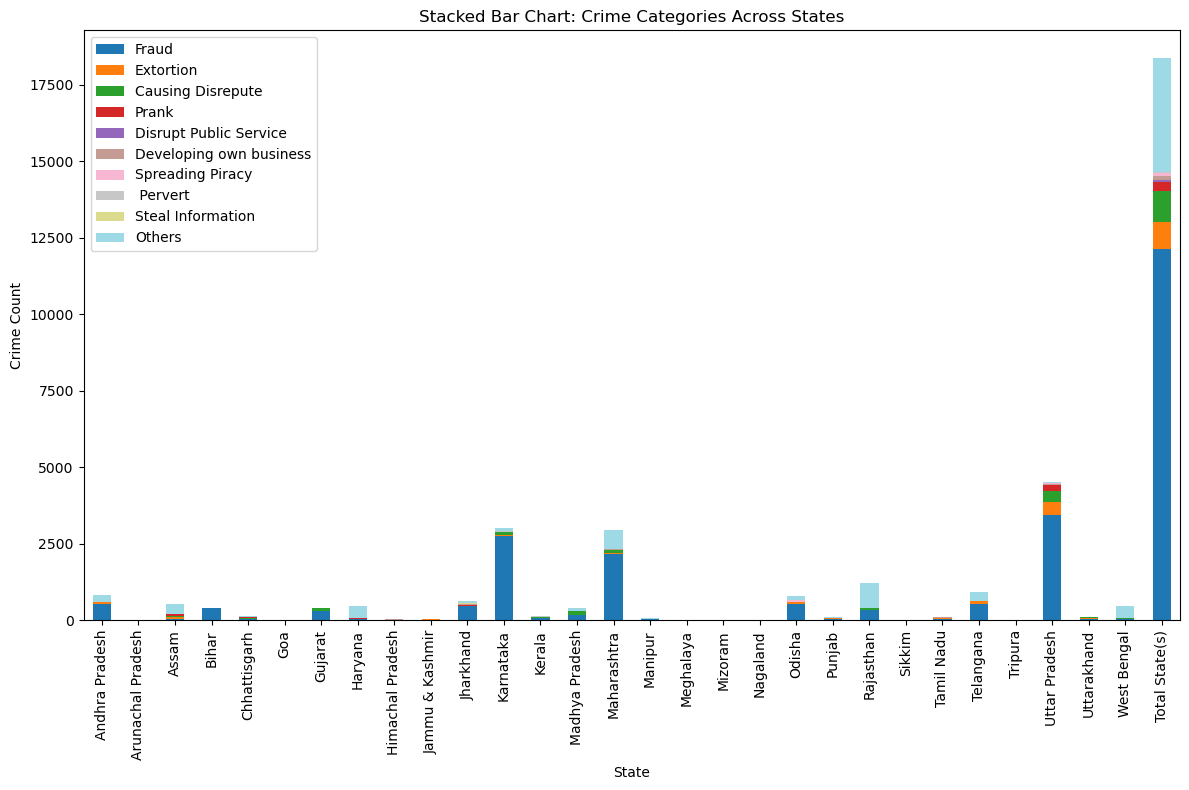

<Figure size 1200x800 with 0 Axes>

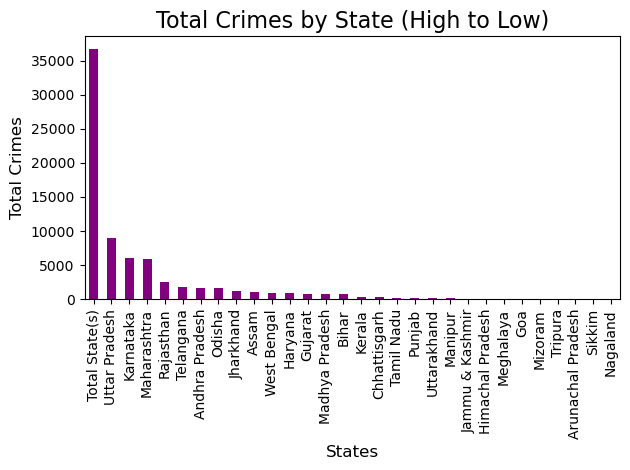

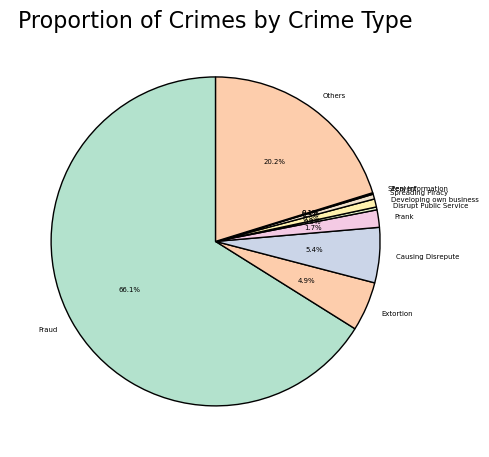

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# File path to the CSV file
file_path = r"C:\\Users\\kavan\\OneDrive\\Documents\\state.csv"

# Load data from CSV
df = pd.read_csv(file_path)

# Display first few rows of the dataframe to ensure it's loaded correctly
print("First few rows of the loaded data:")
print(df.head())

# Remove columns or rows with all zero values
df_non_zero = df.loc[:, (df != 0).any(axis=0)]  # Keep columns where not all values are zero
df_non_zero = df_non_zero.loc[(df_non_zero != 0).any(axis=1)]  # Keep rows where not all values are zero

# Ensure that the 'State' column is excluded for correlation analysis
df_non_zero_numeric = df_non_zero.select_dtypes(include=['number'])  # Select only numeric columns

# 1. Descriptive Statistics
#provide a summary of the central tendency, dispersion, and shape of the distribution of dataset
print("Descriptive Statistics:")
print(df.describe())

# 2. Correlation Analysis (Pearson)
print("Correlation Analysis (Pearson):")
correlation_pearson = df_non_zero_numeric.corr(method='pearson')
print(correlation_pearson)

# Plotting Correlation Heatmap
#Heatmap to show correlations between crime categories
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm')
plt.title("Crime Types Correlation Heatmap")
plt.show()

print("\n")

# 3. Stacked Bar Chart to compare crime counts across states for each category
df.set_index('state')[['Fraud', 'Extortion', 'Causing Disrepute', 'Prank', 'Disrupt Public Service', 'Developing own business', 'Spreading Piracy', ' Pervert', 'Steal Information', 'Others']].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Stacked Bar Chart: Crime Categories Across States')
plt.xlabel('State')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Bar Chart Showing States Ordered by Total Number of Offenses
# Calculate total crime for each state (sum across all offenses)
df['total'] = df.iloc[:, 1:].sum(axis=1)  # Assuming the first column is 'State' and the rest are crimes

# Sort the states by total crimes from high to low
sorted_df = df[['state', 'total']].sort_values(by='total', ascending=False)

# Plot the total crimes by state in a bar chart
plt.figure(figsize=(12, 8))
sorted_df.plot(kind='bar', x='state', y='total', legend=False, color='purple')
plt.title('Total Crimes by State (High to Low)', fontsize=16)
plt.xlabel('States', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Pie Chart for Total Crimes by Crime Type (Proportions)
# Calculate the total number of crimes for each crime type (sum across all states)
crime_types = df.drop(columns=['state', 'total']).sum()

# Plot the pie chart to show the distribution of crimes by type
plt.figure(figsize=(5, 5))
crime_types.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Pastel2", len(crime_types)), startangle=90,
                 wedgeprops={'edgecolor': 'black'},labeldistance=1.1, fontsize=5)

# Customize the chart
plt.title('Proportion of Crimes by Crime Type', fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.show()




